# Hvector
<hr style="border-top-width: 4px; border-top-color: #34609b;">
Write and read STL vectors in a tree.




**Author:** The ROOT Team  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-mirror/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer (Beta)</a> from the macro found in the ROOT repository  on Tuesday, January 17, 2017 at 02:43 PM.</small></i>

In [1]:
%%cpp -d
#include <vector>

#include "TFile.h"
#include "TTree.h"
#include "TCanvas.h"
#include "TFrame.h"
#include "TH1F.h"
#include "TBenchmark.h"
#include "TRandom.h"
#include "TSystem.h"

 A helper function is created: 

In [2]:
%%cpp -d
void write()
{

   TFile *f = TFile::Open("hvector.root","RECREATE");

   if (!f) { return; }

   // Create one histograms
   TH1F *hpx = new TH1F("hpx","This is the px distribution",100,-4,4);
   hpx->SetFillColor(48);

   std::vector<float> vpx;
   std::vector<float> vpy;
   std::vector<float> vpz;
   std::vector<float> vrand;

   // Create a TTree
   TTree *t = new TTree("tvec","Tree with vectors");
   t->Branch("vpx",&vpx);
   t->Branch("vpy",&vpy);
   t->Branch("vpz",&vpz);
   t->Branch("vrand",&vrand);

   // Create a new canvas.
   TCanvas *c1 = new TCanvas("c1","Dynamic Filling Example",200,10,700,500);

   gRandom->SetSeed();
   const Int_t kUPDATE = 1000;
   for (Int_t i = 0; i < 25000; i++) {
      Int_t npx = (Int_t)(gRandom->Rndm(1)*15);

      vpx.clear();
      vpy.clear();
      vpz.clear();
      vrand.clear();

      for (Int_t j = 0; j < npx; ++j) {

         Float_t px,py,pz;
         gRandom->Rannor(px,py);
         pz = px*px + py*py;
         Float_t random = gRandom->Rndm(1);

         hpx->Fill(px);

         vpx.emplace_back(px);
         vpy.emplace_back(py);
         vpz.emplace_back(pz);
         vrand.emplace_back(random);

      }
      if (i && (i%kUPDATE) == 0) {
         if (i == kUPDATE) hpx->Draw();
         c1->Modified();
         c1->Update();
         if (gSystem->ProcessEvents())
            break;
      }
      t->Fill();
   }
   f->Write();

   delete f;
}

 A helper function is created: 

In [3]:
%%cpp -d
void read()
{

   TFile *f = TFile::Open("hvector.root","READ");

   if (!f) { return; }

   TTree *t; f->GetObject("tvec",t);

   std::vector<float> *vpx = 0;

  // Create a new canvas.
   TCanvas *c1 = new TCanvas("c1","Dynamic Filling Example",200,10,700,500);

   const Int_t kUPDATE = 1000;

   TBranch *bvpx = 0;
   t->SetBranchAddress("vpx",&vpx,&bvpx);


   // Create one histograms
   TH1F *h = new TH1F("h","This is the px distribution",100,-4,4);
   h->SetFillColor(48);

   for (Int_t i = 0; i < 25000; i++) {

      Long64_t tentry = t->LoadTree(i);
      bvpx->GetEntry(tentry);

      for (UInt_t j = 0; j < vpx->size(); ++j) {

         h->Fill(vpx->at(j));

      }
      if (i && (i%kUPDATE) == 0) {
         if (i == kUPDATE) h->Draw();
         c1->Modified();
         c1->Update();
         if (gSystem->ProcessEvents())
            break;
      }
   }

   // Since we passed the address of a local variable we need
   // to remove it.
   t->ResetBranchAddresses();
}

In [4]:
gBenchmark->Start("hvector");

write();
read();

// gBenchmark->Show("hvector");

hvector   : Real Time =   0.26 seconds Cpu Time =   0.25 seconds


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


Draw all canvases 

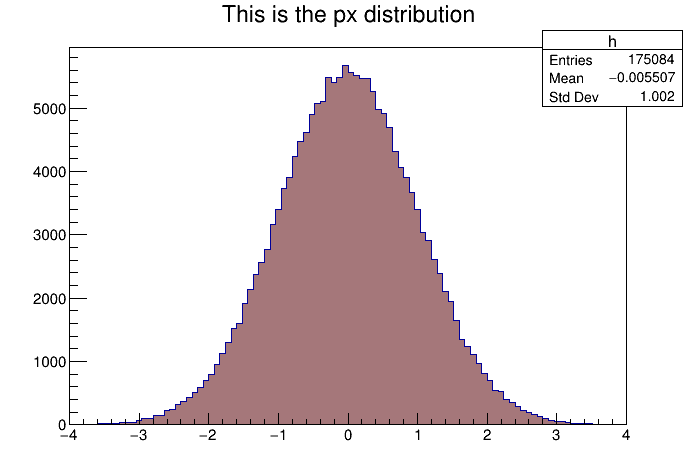

In [5]:
gROOT->GetListOfCanvases()->Draw()